## Análises parte 2

Deletar tudo fora do bloco yaml

In [27]:
import glob

# Loop pelos arquivos .md e remove tudo fora do bloco YAML
for file_path in glob.glob('content/Videos/*.md'):
    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.read().split('---')[1]
    with open(file_path, 'w', encoding='utf-8') as f:
        f.write('---\n' + content + '---\n')


Ler campos de interesse, importar para csv

In [63]:
import glob
import csv
import yaml

# Inicializa a lista de dicionários de dados
data_list = []

# Loop pelos arquivos .md e lê os campos YAML
for file in glob.glob("content/Videos/*.md"):
    with open(file, "r", encoding='utf-8', errors='ignore') as f:
        yaml_data = yaml.load_all(f, Loader=yaml.Loader)
        if yaml_data is not None:
            for data in yaml_data:
                if data is not None and 'canal' in data:
                    data_dict = {}
                    data_dict['Tagsvideo'] = ', '.join(map(str, data.get('Tagsvideo', []) or []))
                    data_dict['canal'] = data.get('canal', '')
                    data_dict['Published'] = data.get('Published', '')
                    data_dict['Description'] = data.get('Description', '')
                    data_dict['monetized'] = data.get('monetized', '')
                    data_dict['abordagem'] = ', '.join(map(str, data.get('abordagem', []) or []))
                    data_dict['conteudo'] = ', '.join(map(str, data.get('conteudo', []) or []))
                    data_dict['objeto'] = ', '.join(map(str, data.get('objeto', []) or []))
                    data_dict['suporte'] = data.get('suporte', '')
                    data_dict['publico-alvo'] = ', '.join(map(str, data.get('publico-alvo', []) or []))
                    data_dict['relevante'] = ', '.join(map(str, data.get('relevante', []) or []))
                    data_list.append(data_dict)

# Escreve os dados em um arquivo CSV
with open('output.csv', 'w', newline='', encoding='utf-8') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=data_list[0].keys())

    # Escreve os cabeçalhos
    writer.writeheader()

    # Escreve os dados
    for data_row in data_list:
        writer.writerow(data_row)


Videos por mês


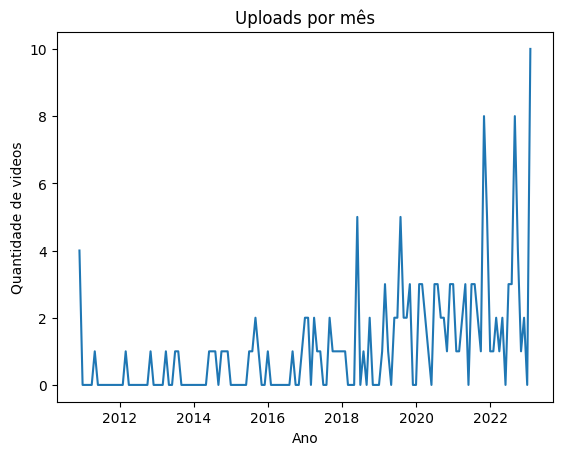

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file into a pandas DataFrame
df = pd.read_csv('/content/videosver01.csv')

# Convert 'Published' column to datetime format
df['Published'] = pd.to_datetime(df['Published'])

# Group data by month and count occurrences
monthly_counts = df.groupby(pd.Grouper(key='Published', freq='M')).size()

# Plot the data as a line chart
plt.plot(monthly_counts.index, monthly_counts.values)
plt.xlabel('Ano')
plt.ylabel('Quantidade de videos')
plt.title('Uploads por mês')
plt.show()


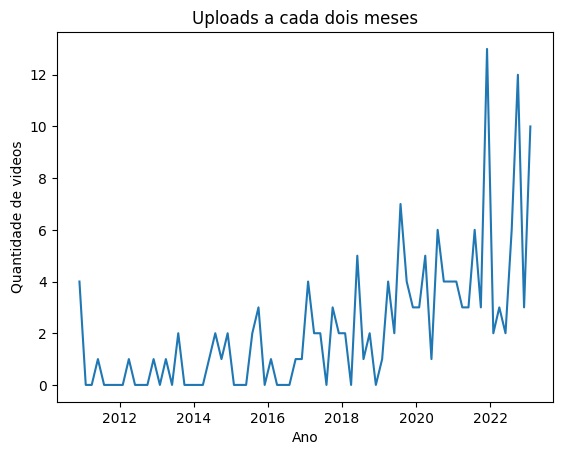

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file into a pandas DataFrame
df = pd.read_csv('/content/videosver01.csv')

# Convert 'Published' column to datetime format
df['Published'] = pd.to_datetime(df['Published'])

# Group data by month and count occurrences
bi_monthly_counts = df.groupby(pd.Grouper(key='Published', freq='2M')).size()

# Plot the data as a line chart
plt.plot(bi_monthly_counts.index, bi_monthly_counts.values)
plt.xlabel('Ano')
plt.ylabel('Quantidade de videos')
plt.title('Uploads a cada dois meses')
plt.show()


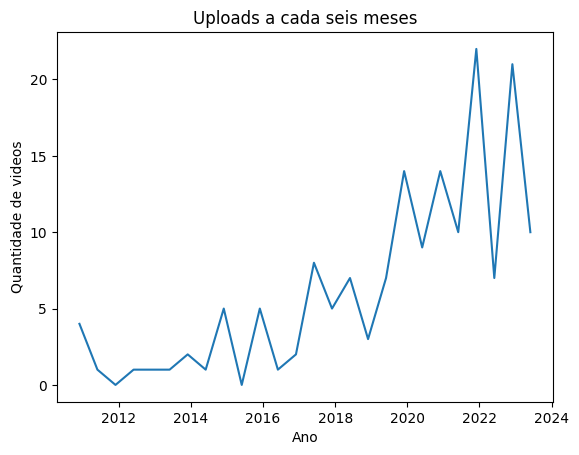

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV file into a pandas DataFrame
df = pd.read_csv('output.csv')

# Convert 'Published' column to datetime format
df['Published'] = pd.to_datetime(df['Published'])

# Group data by month and count occurrences
bi_monthly_counts = df.groupby(pd.Grouper(key='Published', freq='6M')).size()

# Plot the data as a line chart
plt.plot(bi_monthly_counts.index, bi_monthly_counts.values)
plt.xlabel('Ano')
plt.ylabel('Quantidade de videos')
plt.title('Uploads a cada seis meses')
plt.show()


## Nuvem de palavras das Tags dos videos

In [79]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

nltk.download('stopwords')
nltk.download('punkt')

df = pd.read_csv('/content/videosver01.csv')
tags_list = df['Tagsvideo'].str.cat(sep=',').split(',')


# Definir a lista de stopwords em português
stop_words = set(stopwords.words('portuguese'))

# Criar um dicionário vazio para armazenar as frequências de palavras
word_freq = {}

# Loop pelas linhas do dataframe
for tags in df['Tagsvideo']:
    # Converter cada campo em uma string usando str()
    text = str(tags)
    # Tokenizar o texto em palavras
    words = nltk.word_tokenize(text.lower())
    # Remover as stopwords do texto
    filtered_words = [word for word in words if not word.lower() in stop_words]
    # Contar a frequência de cada palavra e adicionar ao dicionário
    for word in filtered_words:
        if word in word_freq:
            word_freq[word] += 1
        else:
            word_freq[word] = 1

# Carregar a imagem da máscara
mask = np.array(Image.open("/content/mask3.png"))

# Gerar as cores para a nuvem de palavras com base na máscara
image_colors = ImageColorGenerator(mask)

# Criar o objeto WordCloud com a máscara e as frequências de palavras
wordcloud = WordCloud(width=800, height=800,
                      background_color='white',
                      mask=mask,
                      min_font_size=10,
                      max_font_size=100).generate_from_frequencies(word_freq)

# Aplicar as cores da máscara na nuvem de palavras
wordcloud = wordcloud.recolor(color_func=image_colors)

# Mostrar a imagem gerada
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)

# Salvar a imagem gerada
plt.savefig('mapa_de_palavras.png')

ModuleNotFoundError: No module named 'wordcloud'

In [77]:
print (df['Tagsvideo'].str.cat(sep=',').split(','))

['Restauração', ' Patrimônio', ' Educação patrimonial', ' História de Itaguaí', ' Itaguaí', 'pintura', ' arte', ' restauração', ' guerra e paz', ' Portinari', ' CHC', ' Ciência Hoje das Crianças', ' ciência', 'Arte', ' Cultura', ' UNIMEP', 'P', ' r', ' o', ' m', ' o', ' t', ' o', ' r', ' ', '', ' d', ' e', ' ', '', ' J', ' u', ' s', ' t', ' i', ' ç', ' a', ' ', '', ' M', ' i', ' n', ' i', ' s', ' t', ' é', ' r', ' i', ' o', ' ', '', ' P', ' ú', ' b', ' l', ' i', ' c', ' o', ' ', '', ' S', ' a', ' n', ' t', ' a', ' ', '', ' C', ' a', ' t', ' a', ' r', ' i', ' n', ' a', ' ', '', ' R', ' e', ' s', ' t', ' a', ' u', ' r', ' a', ' ç', ' ã', ' o', ' ', '', ' N', ' o', ' s', ' s', ' a', '  ', ' s', ' e', ' n', ' h', ' o', ' r', ' a', '  ', ' d', ' a', ' s', '  ', ' d', ' o', ' r', ' e', ' s', ' ', '', ' G', ' a', ' r', ' o', ' p', ' a', ' b', ' a', ' ', '', ' o', ' b', ' r', ' a', '  ', ' s', ' a', ' c', ' r', ' a', ' ', '', ' p', ' a', ' t', ' r', ' i', ' m', ' ô', ' n', ' i', ' o', '  ', ' 